In [1]:
# importing the required libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tabulate

# Cats And Dogs Dataset

In [2]:
# downloading the cats_and_dogs dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-23 18:10:29--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   210MB/s    in 0.3s    

2022-08-23 18:10:30 (210 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# unzipping
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# rescaling images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [6]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [7]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.15.jpg', 'cat.277.jpg', 'cat.617.jpg', 'cat.165.jpg', 'cat.662.jpg', 'cat.696.jpg', 'cat.885.jpg', 'cat.365.jpg', 'cat.818.jpg', 'cat.504.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


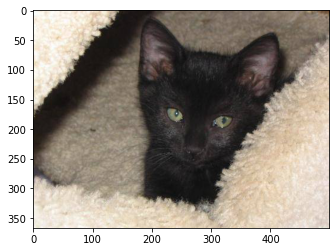

In [9]:
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[10])))

In [10]:
# building the AlexNet architecture
AlexNet = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Conv2D(256, kernel_size=(5,5), strides=(1,1), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

AlexNet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 384)       1

In [11]:
# training AlexNet
AlexNet.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

history1 = AlexNet.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50)  # 1000 images = batch_size * steps

Epoch 1/2
100/100 [==============================] - 22s 190ms/step - loss: 0.6979 - acc: 0.5160 - val_loss: 0.6890 - val_acc: 0.5000
Epoch 2/2
100/100 [==============================] - 11s 105ms/step - loss: 0.6953 - acc: 0.5020 - val_loss: 0.6918 - val_acc: 0.5850


In [12]:
# building the VGG-16 architecture
from keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
# modifying for this use case (2 output classes)
VGGModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
VGGModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [14]:
# training VGG-16
VGGModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history2 = VGGModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 20s 176ms/step - loss: 0.4889 - acc: 0.7705 - val_loss: 0.3482 - val_acc: 0.8670
Epoch 2/2
100/100 [==============================] - 18s 175ms/step - loss: 0.2820 - acc: 0.9010 - val_loss: 0.2925 - val_acc: 0.8880


In [15]:
# building the GoogLeNet architecture
from keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 alization)                     )                                                      

In [16]:
# modifying for this use case (2 output classes)
GoogleNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
GoogleNetModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [17]:
# training GoogLeNet
GoogleNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history3 = GoogleNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 18s 134ms/step - loss: 0.0944 - acc: 0.9660 - val_loss: 0.0515 - val_acc: 0.9830
Epoch 2/2
100/100 [==============================] - 12s 118ms/step - loss: 0.0083 - acc: 0.9965 - val_loss: 0.0584 - val_acc: 0.9840


In [18]:
# building the ResNet50 architecture
from keras.applications.resnet import ResNet50
base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [19]:
# modifying for this use case (2 output classes)
ResNet50Model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
ResNet50Model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [20]:
# training ResNet50
ResNet50Model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history4 = ResNet50Model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 17s 136ms/step - loss: 0.6979 - acc: 0.5760 - val_loss: 0.6599 - val_acc: 0.6130
Epoch 2/2
100/100 [==============================] - 13s 127ms/step - loss: 0.6438 - acc: 0.6270 - val_loss: 0.6342 - val_acc: 0.6450


In [21]:
# building the EfficientNetB0 architecture
from keras.applications.efficientnet import EfficientNetB0
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_5[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [22]:
# modifying for this use case (2 output classes)
EfficientNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
EfficientNetModel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [23]:
# training EfficientNetB0
EfficientNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history5 = EfficientNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 18s 127ms/step - loss: 0.7945 - acc: 0.5085 - val_loss: 0.7251 - val_acc: 0.5000
Epoch 2/2
100/100 [==============================] - 12s 121ms/step - loss: 0.7440 - acc: 0.5040 - val_loss: 0.7090 - val_acc: 0.5000


In [24]:
# building the MobileNetV2 architecture
from keras.applications.mobilenet_v2 import MobileNetV2
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [25]:
# modifying for this use case (2 output classes)
MobileNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
MobileNetModel.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [26]:
# training MobileNetV2
MobileNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history6 = MobileNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 14s 115ms/step - loss: 0.1337 - acc: 0.9560 - val_loss: 0.1396 - val_acc: 0.9590
Epoch 2/2
100/100 [==============================] - 12s 118ms/step - loss: 0.0134 - acc: 0.9960 - val_loss: 0.1021 - val_acc: 0.9700


In [27]:
# tabulating the results for the cats and dogs dataset
table_cats_and_dogs = [['Model', 'Loss', 'Accuracy', 'Validation Loss', 'Validation Accuracy'],
         ['AlexNet', history1.history["loss"][-1], history1.history["acc"][-1], history1.history["val_loss"][-1], history1.history["val_acc"][-1]],
         ['VGG-16', history2.history["loss"][-1], history2.history["acc"][-1], history2.history["val_loss"][-1], history2.history["val_acc"][-1]],
         ['GoogLeNet', history3.history["loss"][-1], history3.history["acc"][-1], history3.history["val_loss"][-1], history3.history["val_acc"][-1]],
         ['ResNet50', history4.history["loss"][-1], history4.history["acc"][-1], history4.history["val_loss"][-1], history4.history["val_acc"][-1]],
         ['EfficientNetB0', history5.history["loss"][-1], history5.history["acc"][-1], history5.history["val_loss"][-1], history5.history["val_acc"][-1]],
         ['MobileNetV2', history6.history["loss"][-1], history6.history["acc"][-1], history6.history["val_loss"][-1], history6.history["val_acc"][-1]]]

# Horse2Zebra Dataset

In [28]:
# downloading the Horse2Zebra dataset
!wget --no-check-certificate \
    http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip \
    -O /tmp/horse2zebra.zip

--2022-08-23 18:14:17--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/horse2zebra.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116867962 (111M) [application/zip]
Saving to: ‘/tmp/horse2zebra.zip’

/tmp/horse2zebra.zi 100%[===================>] 111.45M   140KB/s    in 3m 30s  

2022-08-23 18:17:48 (542 KB/s) - ‘/tmp/horse2zebra.zip’ saved [116867962/116867962]



In [29]:
# unzipping
local_zip = '/tmp/horse2zebra.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [30]:
# creating train and validation directories
!mkdir -v /tmp/horse2zebra/train /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/testA /tmp/horse2zebra/testB /tmp/horse2zebra/validation
!mv -v /tmp/horse2zebra/trainA /tmp/horse2zebra/trainB /tmp/horse2zebra/train

mkdir: cannot create directory ‘/tmp/horse2zebra/train’: File exists
mkdir: cannot create directory ‘/tmp/horse2zebra/validation’: File exists
mv: cannot move '/tmp/horse2zebra/testA' to '/tmp/horse2zebra/validation/testA': Directory not empty
mv: cannot move '/tmp/horse2zebra/testB' to '/tmp/horse2zebra/validation/testB': Directory not empty
mv: cannot move '/tmp/horse2zebra/trainA' to '/tmp/horse2zebra/train/trainA': Directory not empty
mv: cannot move '/tmp/horse2zebra/trainB' to '/tmp/horse2zebra/train/trainB': Directory not empty


In [31]:
base_dir = '/tmp/horse2zebra'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_horses_dir = os.path.join(train_dir, 'trainA')

train_zebras_dir = os.path.join(train_dir, 'trainB')

validation_horses_dir = os.path.join(validation_dir, 'testA')

validation_zebras_dir = os.path.join(validation_dir, 'testB')

In [32]:
# rescaling images by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [33]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [34]:
validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [35]:
train_horses_fnames = os.listdir(train_horses_dir)
print(train_horses_fnames[:10])

train_zebras_fnames = os.listdir(train_zebras_dir)
train_zebras_fnames.sort()
print(train_zebras_fnames[:10])

['n02381460_6252.jpg', 'n02381460_4711.jpg', 'n02381460_4472.jpg', 'n02381460_2822.jpg', 'n02381460_1573.jpg', 'n02381460_6204.jpg', 'n02381460_4307.jpg', 'n02381460_1874.jpg', 'n02381460_3995.jpg', 'n02381460_5135.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


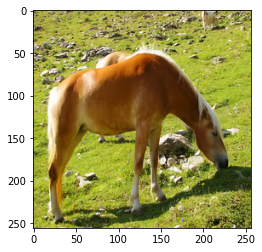

In [36]:
plt.imshow(mpimg.imread(os.path.join(train_horses_dir, train_horses_fnames[10])))

In [37]:
# building the AlexNet architecture
AlexNet = tf.keras.Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(96, kernel_size=(11,11), strides=(4,4), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Conv2D(256, kernel_size=(5,5), strides=(1,1), activation="relu", padding="valid"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(384, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=(2,2), padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

AlexNet.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 96)       0         
 2D)                                                             
                                                                 
 conv2d_100 (Conv2D)         (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_101 (Conv2D)         (None, 10, 10, 384)       885120    
                                                                 
 conv2d_102 (Conv2D)         (None, 10, 10, 384)      

In [38]:
# training AlexNet
AlexNet.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

history1 = AlexNet.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10)  # 1000 images = batch_size * steps

Epoch 1/2
100/100 [==============================] - 8s 70ms/step - loss: 0.5072 - acc: 0.7466 - val_loss: 0.3545 - val_acc: 0.8600
Epoch 2/2
100/100 [==============================] - 7s 65ms/step - loss: 0.3654 - acc: 0.8405 - val_loss: 0.2963 - val_acc: 0.8650


In [39]:
# building the VGG-16 architecture
base_model = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
# modifying for this use case (2 output classes)
VGGModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
VGGModel.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_7 (Flatten)         (None, 25088)             0         
                                                                 
 dense_11 (Dense)            (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


In [41]:
# training VGG-16
VGGModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history2 = VGGModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 14s 136ms/step - loss: 0.3751 - acc: 0.8460 - val_loss: 0.2163 - val_acc: 0.9100
Epoch 2/2
100/100 [==============================] - 13s 128ms/step - loss: 0.1711 - acc: 0.9470 - val_loss: 0.1437 - val_acc: 0.9400


In [42]:
# building the GoogLeNet architecture
base_model = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_104 (Conv2D)            (None, 111, 111, 32  864         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_104[0][0]']             
 ormalization)                  )                                                      

In [43]:
# modifying for this use case (2 output classes)
GoogleNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
GoogleNetModel.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_8 (Flatten)         (None, 51200)             0         
                                                                 
 dense_12 (Dense)            (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


In [44]:
# training GoogLeNet
GoogleNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history3 = GoogleNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 13s 97ms/step - loss: 0.0711 - acc: 0.9717 - val_loss: 0.0410 - val_acc: 0.9850
Epoch 2/2
100/100 [==============================] - 7s 74ms/step - loss: 0.0179 - acc: 0.9934 - val_loss: 0.0573 - val_acc: 0.9850


In [45]:
# building the ResNet50 architecture
base_model = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [46]:
# modifying for this use case (2 output classes)
ResNet50Model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
ResNet50Model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 100352)            0         
                                                                 
 dense_13 (Dense)            (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [47]:
# training ResNet50
ResNet50Model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history4 = ResNet50Model.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 13s 96ms/step - loss: 0.5895 - acc: 0.6835 - val_loss: 0.4410 - val_acc: 0.8100
Epoch 2/2
100/100 [==============================] - 8s 84ms/step - loss: 0.4336 - acc: 0.7945 - val_loss: 0.4888 - val_acc: 0.7550


In [48]:
# building the EfficientNetB0 architecture
base_model = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['input_11[0][0]']               
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_1[0][0]']            
 )                                                                                                
                                                                                     

In [49]:
# modifying for this use case (2 output classes)
EfficientNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
EfficientNetModel.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_10 (Flatten)        (None, 62720)             0         
                                                                 
 dense_14 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


In [50]:
# training EfficientNetB0
EfficientNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history5 = EfficientNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 15s 89ms/step - loss: 0.7303 - acc: 0.5255 - val_loss: 0.6822 - val_acc: 0.5350
Epoch 2/2
100/100 [==============================] - 7s 71ms/step - loss: 0.7164 - acc: 0.5396 - val_loss: 0.6913 - val_acc: 0.5300


In [51]:
# building the MobileNetV2 architecture
base_model = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model.trainable = False #freeze the layers
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [52]:
# modifying for this use case (2 output classes)
MobileNetModel = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
MobileNetModel.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_11 (Flatten)        (None, 62720)             0         
                                                                 
 dense_15 (Dense)            (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


In [53]:
# training MobileNetV2
MobileNetModel.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])
history6 = MobileNetModel.fit(
train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=2,
      validation_data=validation_generator,
      validation_steps=10,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/2
100/100 [==============================] - 10s 75ms/step - loss: 0.0790 - acc: 0.9702 - val_loss: 0.0754 - val_acc: 0.9800
Epoch 2/2
100/100 [==============================] - 7s 66ms/step - loss: 0.0131 - acc: 0.9955 - val_loss: 0.0872 - val_acc: 0.9850


## Tabulating and comparing the results

In [54]:
# tabulating the results for the Horse2Zebra dataset
table_horse2zebra = [['Model', 'Loss', 'Accuracy', 'Validation Loss', 'Validation Accuracy'],
         ['AlexNet', history1.history["loss"][-1], history1.history["acc"][-1], history1.history["val_loss"][-1], history1.history["val_acc"][-1]],
         ['VGG-16', history2.history["loss"][-1], history2.history["acc"][-1], history2.history["val_loss"][-1], history2.history["val_acc"][-1]],
         ['GoogLeNet', history3.history["loss"][-1], history3.history["acc"][-1], history3.history["val_loss"][-1], history3.history["val_acc"][-1]],
         ['ResNet50', history4.history["loss"][-1], history4.history["acc"][-1], history4.history["val_loss"][-1], history4.history["val_acc"][-1]],
         ['EfficientNetB0', history5.history["loss"][-1], history5.history["acc"][-1], history5.history["val_loss"][-1], history5.history["val_acc"][-1]],
         ['MobileNetV2', history6.history["loss"][-1], history6.history["acc"][-1], history6.history["val_loss"][-1], history6.history["val_acc"][-1]]]

print(tabulate.tabulate(table_horse2zebra, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤═══════════╤════════════╤═══════════════════╤═══════════════════════╕
│ Model          │      Loss │   Accuracy │   Validation Loss │   Validation Accuracy │
╞════════════════╪═══════════╪════════════╪═══════════════════╪═══════════════════════╡
│ AlexNet        │ 0.365368  │   0.840485 │         0.296294  │                 0.865 │
├────────────────┼───────────┼────────────┼───────────────────┼───────────────────────┤
│ VGG-16         │ 0.171135  │   0.946996 │         0.143744  │                 0.94  │
├────────────────┼───────────┼────────────┼───────────────────┼───────────────────────┤
│ GoogLeNet      │ 0.0178794 │   0.993438 │         0.0573132 │                 0.985 │
├────────────────┼───────────┼────────────┼───────────────────┼───────────────────────┤
│ ResNet50       │ 0.433627  │   0.794548 │         0.488777  │                 0.755 │
├────────────────┼───────────┼────────────┼───────────────────┼───────────────────────┤
│ EfficientNetB0 │ 0.716391  │  

In [55]:
# tabulating the results for the cats_and_dogs dataset
print(tabulate.tabulate(table_cats_and_dogs, headers='firstrow', tablefmt='fancy_grid'))

╒════════════════╤════════════╤════════════╤═══════════════════╤═══════════════════════╕
│ Model          │       Loss │   Accuracy │   Validation Loss │   Validation Accuracy │
╞════════════════╪════════════╪════════════╪═══════════════════╪═══════════════════════╡
│ AlexNet        │ 0.695296   │     0.502  │         0.691831  │                 0.585 │
├────────────────┼────────────┼────────────┼───────────────────┼───────────────────────┤
│ VGG-16         │ 0.282013   │     0.901  │         0.292532  │                 0.888 │
├────────────────┼────────────┼────────────┼───────────────────┼───────────────────────┤
│ GoogLeNet      │ 0.00827511 │     0.9965 │         0.0584162 │                 0.984 │
├────────────────┼────────────┼────────────┼───────────────────┼───────────────────────┤
│ ResNet50       │ 0.643812   │     0.627  │         0.634205  │                 0.645 │
├────────────────┼────────────┼────────────┼───────────────────┼───────────────────────┤
│ EfficientNetB0 │ 0.

AlexNet and ResNet50 work much better on Horse2Zebra (86%, 75%) than cats_and_dogs (58%, 64%).

VGG-16, GoogLeNet, and MobileNetV2 work very well on both datasets.

EfficientNetB0 works equally badly on both datasets. (~50%)